In [1]:
import numpy as np

from Related_Codes.DCNAutoencoder import DCNAutoencoder, DCNCDAutoencoder
from Related_Codes.DECAutoencoder import DECAutoencoder, DECCDAutoencoder
from Related_Codes.IDECAutoencoder import IDECAutoencoder, IDECCDAutoencoder
from General_Functions import General_Functions

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap, TSNE

import torch

import os
import sys

from Datasets.Datasets_Functions import *
from Visualization import Visualization

In [2]:
path_to_module = './'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

In [3]:
hashmap_path = path_to_module + 'Datasets/'
hashmap = get_hashmap(hashmap_path)
print(hashmap)
dataset_name = "emnist_balanced_digits"
dataset_properties = hashmap[dataset_name]
batch_size = dataset_properties['batch_size'] = 256
n_clusters = dataset_properties['n_clusters'] = 10
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_name, dataset_properties)
print(input_dim)

{'tcga': {'batch_size': 256, 'n_clusters': 5, 'module_name': 'Datasets.Datasets'}, 'emnist_balanced_letters': {'batch_size': 1024, 'n_clusters': 10, 'module_name': 'Datasets.Datasets'}, 'emnist_mnist': {'batch_size': 1024, 'n_clusters': 10, 'module_name': 'Datasets.Datasets'}, 'emnist_balanced_digits': {'batch_size': 1024, 'n_clusters': 10, 'module_name': 'Datasets.Datasets'}, 'dermatology': {'batch_size': 64, 'n_clusters': 6, 'module_name': 'Datasets.Datasets'}, 'ecoil': {'batch_size': 64, 'n_clusters': 8, 'module_name': 'Datasets.Datasets'}, 'iris': {'batch_size': 64, 'n_clusters': 3, 'module_name': 'Datasets.Datasets'}, 'rings': {'batch_size': 64, 'n_clusters': 2, 'module_name': 'Datasets.Datasets'}, 'wine': {'batch_size': 64, 'n_clusters': 3, 'module_name': 'Datasets.Datasets'}, 'australian': {'batch_size': 64, 'n_clusters': 2, 'module_name': 'Datasets.Datasets'}, 'moons': {'batch_size': 64, 'n_clusters': 2, 'module_name': 'Datasets.Datasets'}, 'squeezed_gauss': {'batch_size': 64, 

[nltk_data] Downloading package punkt to C:\Users\PAPASOFT
[nltk_data]     INC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PAPASOFT
[nltk_data]     INC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1


In [4]:
visualization = Visualization()

In [5]:
visualization.kmeans_initializatio()

AttributeError: 'Visualization' object has no attribute 'kmeans_initializatio'

### IDec

In [ ]:
n_clusters = dataset_properties['n_clusters']

# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']

# Pre-Training Epochs and Learning Rate
n_pret_epochs = 100
pret_lr = 1e-3

# Lamdas, Training Epochs and Learning Rate
n_epochs = 100
lr = 5e-4
alpha = 1.0
gamma = 0.1
momentum = 0.9
latent_dim = 10
n_channels = 1
is_MLP_AE = False

if(is_MLP_AE):
    idec_autoencoder = IDECAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim)
else:  
    input_dim = 1
    idec_autoencoder = IDECCDAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, n_channels=n_channels) 
idec_autoencoder.set_general_training_variables(dataloader=dataloader, batch_size=batch_size)
idec_autoencoder.set_pretraining_variables(n_pret_epochs=n_pret_epochs, pret_lr=pret_lr)
idec_autoencoder.set_training_variables(n_epochs=n_epochs, lr=lr, momentum=momentum, alpha=alpha, gamma=gamma)
idec_autoencoder.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
idec_autoencoder.set_path()
idec_autoencoder = idec_autoencoder.to(device)

pretrain = True
if(pretrain):
    idec_autoencoder.pretrain_autoencoder()
    idec_autoencoder.save_pretrained_weights()
else:
    model_save_path = idec_autoencoder.data_dir_path + '/Weigths/autoencoder_weights.pth'
    idec_autoencoder.load_state_dict(torch.load(model_save_path))

In [ ]:
idec_autoencoder.kmeans_initialization()
idec_autoencoder.train_autoencoder()
cluster_centers = idec_autoencoder.get_cluster_centers()
_, idec_autoencoder_reduced_data, labels = idec_autoencoder.get_latent_data()
General_Functions().save_excel(idec_autoencoder.data_dir_path, idec_autoencoder.df_eval)
#visualization.plot(idec_autoencoder_reduced_data, labels, labels, cluster_centers, idec_autoencoder.data_dir_path)
visualization.plot_tsne(idec_autoencoder_reduced_data, labels, labels, cluster_centers, idec_autoencoder.data_dir_path)

In [ ]:
idec_autoencoder.kmeans_initializatio()

### Dec

In [ ]:
n_clusters = dataset_properties['n_clusters']

# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']

# Pre-Training Epochs and Learning Rate
n_pret_epochs = 100
pret_lr = 1e-3

# Lamdas, Training Epochs and Learning Rate
n_epochs = 100
lr = 5e-4
alpha = 1.0
momentum = 0.9
latent_dim = 10
n_channels = 1
is_MLP_AE = False

if(is_MLP_AE):
    input_dim = 784
    dec_autoencoder = DECAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim)
else:  
    input_dim = 1
    dec_autoencoder = DECCDAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, n_channels=n_channels) 
dec_autoencoder.set_general_training_variables(dataloader=dataloader, batch_size=batch_size)
dec_autoencoder.set_pretraining_variables(n_pret_epochs=n_pret_epochs, pret_lr=pret_lr)
dec_autoencoder.set_training_variables(n_epochs=n_epochs, lr=lr, momentum=momentum, alpha=alpha )
dec_autoencoder.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
dec_autoencoder.set_path()
dec_autoencoder = dec_autoencoder.to(device)

pretrain = True
if(pretrain):
    dec_autoencoder.pretrain_autoencoder()
    dec_autoencoder.save_pretrained_weights()
else:
    model_save_path = dec_autoencoder.data_dir_path + '/Weigths/autoencoder_weights.pth'
    dec_autoencoder.load_state_dict(torch.load(model_save_path))

In [ ]:
dec_autoencoder.kmeans_initialization()
dec_autoencoder.train_autoencoder()
cluster_centers = dec_autoencoder.get_cluster_centers()
_, dec_autoencoder_reduced_data, labels = dec_autoencoder.get_latent_data()
General_Functions().save_excel(dec_autoencoder.data_dir_path, dec_autoencoder.df_eval)
visualization.plot(dec_autoencoder_reduced_data, labels, labels, cluster_centers, dec_autoencoder.data_dir_path)
#visualization.plot_tsne(dec_autoencoder_reduced_data, labels, labels, cluster_centers, dec_autoencoder.data_dir_path)

In [ ]:
dec_autoencoder.kmeans_initializatio()

### Dcn

In [6]:

"""
parser.add_argument('--n-classes', type=int, default=10,
                    help='output dimension')
"""
n_clusters = dataset_properties['n_clusters'] = 10

# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size'] = 256

# Pre-Training Epochs and Learning Rate
"""
parser.add_argument('--pre-epoch', type=int, default=50, 
                    help='number of pre-train epochs')
"""
n_pret_epochs = 100
pret_lr = 1e-3

# Lamdas, Training Epochs and Learning Rate
"""
parser.add_argument('--epoch', type=int, default=100,
                    help='number of epochs to train')
"""
n_epochs = 100
"""
parser.add_argument('--lr', type=float, default=1e-4,
                    help='learning rate (default: 1e-4)')
"""
lr = 1e-4
"""
parser.add_argument('--lamda', type=float, default=1,
                    help='coefficient of the reconstruction loss')
"""
lamda = 1
"""
parser.add_argument('--beta', type=float, default=1,
                    help=('coefficient of the regularization term on '
                          'clustering'))
"""
beta = 1e-5
"""
parser.add_argument('--latent_dim', type=int, default=10,
                    help='latent space dimension')
"""
latent_dim = 10
n_channels = 1
is_MLP_AE = False

if(is_MLP_AE):
    input_dim = 784
    dcn_autoencoder = DCNAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim)
else:  
    input_dim = 1
    dcn_autoencoder = DCNCDAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, n_channels=n_channels) 
dcn_autoencoder.set_general_training_variables(dataloader=dataloader, batch_size=batch_size)
dcn_autoencoder.set_pretraining_variables(n_pret_epochs=n_pret_epochs, pret_lr=pret_lr)
dcn_autoencoder.set_training_variables(n_epochs=n_epochs, lr=lr, lamda=lamda, beta=beta )
dcn_autoencoder.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
dcn_autoencoder.set_path()
dcn_autoencoder = dcn_autoencoder.to(device)
dcn_autoencoder
pretrain = True
if(pretrain):
    dcn_autoencoder.pretrain_autoencoder()
    dcn_autoencoder.save_pretrained_weights()
else:
    model_save_path = dcn_autoencoder.data_dir_path + '/Weigths/autoencoder_weights.pth'
    dcn_autoencoder.load_state_dict(torch.load(model_save_path))

Epoch: 0, Loss: 12.932429
Epoch: 1, Loss: 4.844015
Epoch: 2, Loss: 4.171759
Epoch: 3, Loss: 3.788153
Epoch: 4, Loss: 3.541710
Epoch: 5, Loss: 3.439092
Epoch: 6, Loss: 3.309193
Epoch: 7, Loss: 3.347802
Epoch: 8, Loss: 3.157941
Epoch: 9, Loss: 3.055346
Epoch: 10, Loss: 3.045988
Epoch: 11, Loss: 2.975543
Epoch: 12, Loss: 2.973807
Epoch: 13, Loss: 2.908218
Epoch: 14, Loss: 2.909607
Epoch: 15, Loss: 2.886247
Epoch: 16, Loss: 2.806335
Epoch: 17, Loss: 2.776577
Epoch: 18, Loss: 2.695558
Epoch: 19, Loss: 2.715808
Epoch: 20, Loss: 2.616982
Epoch: 21, Loss: 2.534270
Epoch: 22, Loss: 2.499373
Epoch: 23, Loss: 2.461712
Epoch: 24, Loss: 2.391484
Epoch: 25, Loss: 2.356884
Epoch: 26, Loss: 2.321520
Epoch: 27, Loss: 2.305206
Epoch: 28, Loss: 2.294403
Epoch: 29, Loss: 2.240154
Epoch: 30, Loss: 2.237933
Epoch: 31, Loss: 2.209946
Epoch: 32, Loss: 2.188801
Epoch: 33, Loss: 2.169690
Epoch: 34, Loss: 2.148502
Epoch: 35, Loss: 2.115380
Epoch: 36, Loss: 2.058566
Epoch: 37, Loss: 1.999372
Epoch: 38, Loss: 1.94

Ep: 0 L: 1.5363 Rec L: 1.0993 Dist L: 0.4371 ACC: 0.79 PUR: 0.79 NMI: 0.73 ARI: 0.66
Ep: 1 L: 1.4856 Rec L: 1.0835 Dist L: 0.4021 ACC: 0.80 PUR: 0.80 NMI: 0.74 ARI: 0.67
Ep: 2 L: 1.4499 Rec L: 1.0734 Dist L: 0.3765 ACC: 0.80 PUR: 0.80 NMI: 0.74 ARI: 0.67
Ep: 3 L: 1.4230 Rec L: 1.0670 Dist L: 0.3560 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.67
Ep: 4 L: 1.4023 Rec L: 1.0625 Dist L: 0.3397 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.67
Ep: 5 L: 1.3942 Rec L: 1.0693 Dist L: 0.3248 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.67
Ep: 6 L: 1.3621 Rec L: 1.0504 Dist L: 0.3117 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.67
Ep: 7 L: 1.3735 Rec L: 1.0723 Dist L: 0.3013 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.67
Ep: 8 L: 1.3503 Rec L: 1.0602 Dist L: 0.2902 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.68
Ep: 9 L: 1.3412 Rec L: 1.0601 Dist L: 0.2812 ACC: 0.80 PUR: 0.80 NMI: 0.75 ARI: 0.68
Ep: 10 L: 1.3287 Rec L: 1.0554 Dist L: 0.2733 ACC: 0.80 PUR: 0.80 NMI: 0.76 ARI: 0.68
Ep: 11 L: 1.3246 Rec L: 1.0589 Dist L: 0.2657 ACC: 0.80 PUR: 0.8

Ep: 96 L: 1.1006 Rec L: 0.9883 Dist L: 0.1123 ACC: 0.80 PUR: 0.80 NMI: 0.77 ARI: 0.68
Ep: 97 L: 1.0955 Rec L: 0.9836 Dist L: 0.1119 ACC: 0.80 PUR: 0.80 NMI: 0.77 ARI: 0.68
Ep: 98 L: 1.0992 Rec L: 0.9878 Dist L: 0.1113 ACC: 0.80 PUR: 0.80 NMI: 0.77 ARI: 0.68
Ep: 99 L: 1.1027 Rec L: 0.9917 Dist L: 0.1111 ACC: 0.80 PUR: 0.80 NMI: 0.77 ARI: 0.68
Directory './Results/emnist_balanced_digits/DCNAE/100_Eps_ld_10_out_10_bs_256_lr_0.0001_lamda_1_beta_1e-05' already exists.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28010 samples in 0.043s...


C:\Users\PAPASOFT INC\Documents\GitHub\Soft-Silhouette\General_Functions.py:23: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = workbook
C:\Users\PAPASOFT INC\Documents\GitHub\Soft-Silhouette\General_Functions.py:27: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


[t-SNE] Computed neighbors for 28010 samples in 1.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28010
[t-SNE] Computed conditional probabilities for sample 2000 / 28010
[t-SNE] Computed conditional probabilities for sample 3000 / 28010
[t-SNE] Computed conditional probabilities for sample 4000 / 28010
[t-SNE] Computed conditional probabilities for sample 5000 / 28010
[t-SNE] Computed conditional probabilities for sample 6000 / 28010
[t-SNE] Computed conditional probabilities for sample 7000 / 28010
[t-SNE] Computed conditional probabilities for sample 8000 / 28010
[t-SNE] Computed conditional probabilities for sample 9000 / 28010
[t-SNE] Computed conditional probabilities for sample 10000 / 28010
[t-SNE] Computed conditional probabilities for sample 11000 / 28010
[t-SNE] Computed conditional probabilities for sample 12000 / 28010
[t-SNE] Computed conditional probabilities for sample 13000 / 28010
[t-SNE] Computed conditional probabilities for sample 14000 / 28010

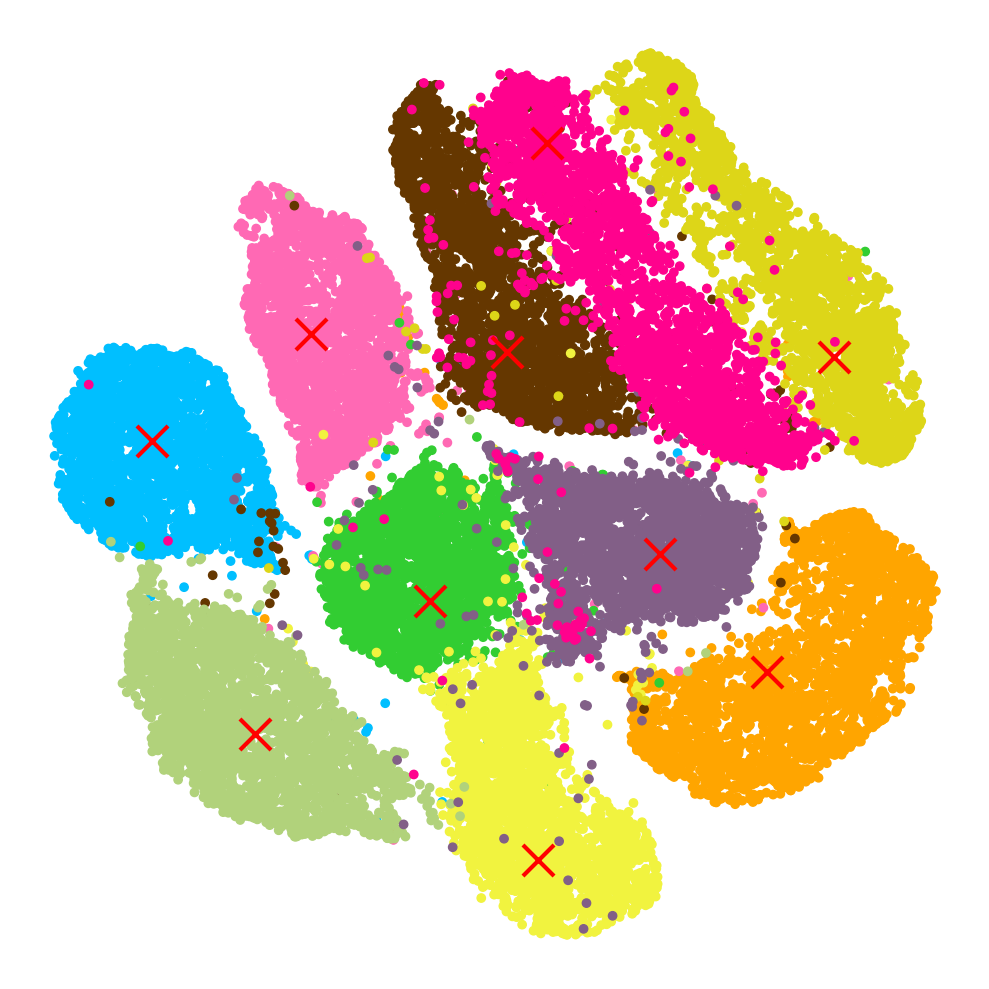

In [7]:
dcn_autoencoder.train_autoencoder()
cluster_centers = dcn_autoencoder.get_cluster_centers()
_, dcn_autoencoder_reduced_data, labels = dcn_autoencoder.get_latent_data()
General_Functions().save_excel(dcn_autoencoder.data_dir_path, dcn_autoencoder.df_eval)
visualization.plot_tsne(dcn_autoencoder_reduced_data, labels, labels, cluster_centers, dcn_autoencoder.data_dir_path)

### Pca

In [ ]:
pca = PCA(n_components=2)
pca_reduced_data = pca.fit_transform(data_np)
visualization.plot(pca_reduced_data, labels, labels, np.empty(0), "./Results/r100/PCA")

### Svd

In [ ]:
svd = TruncatedSVD(n_components=2)
svd_reduced_data = svd.fit_transform(data_np)
visualization.plot(svd_reduced_data, labels, labels, np.empty(0), "./Results/r100/SVD")

### Nmf

In [ ]:
nmf = NMF(n_components=2)
nmf_reduced_data = nmf.fit_transform(data_np)
visualization.plot(nmf_reduced_data, labels, labels, np.empty(0), "./Results/r100/NMF")

### Lle

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle_reduced_data = lle.fit_transform(data_np)
visualization.plot(lle_reduced_data, labels, labels, np.empty(0), "./Results/r100/LLE")

### LapEig

In [ ]:
spectral_embedding = SpectralEmbedding(n_components=2, affinity='rbf')
spectral_reduced_data = spectral_embedding.fit_transform(data_np)
visualization.plot(spectral_reduced_data, labels, labels, np.empty(0), "./Results/r100/LapEig")

### Isomap

In [ ]:
isomap = Isomap(n_neighbors=10, n_components=2)
isomap_reduced_data = isomap.fit_transform(data_np)
visualization.plot(isomap_reduced_data, labels, labels, np.empty(0), "./Results/r100/Isomap")

### t-SNE


In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
tsne_reduced_data = tsne.fit_transform(data_np)
visualization.plot(tsne_reduced_data, labels, labels, np.empty(0), "./Results/r100/TSNE")